In [218]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [220]:
img= cv2.imread('pictures/angry2.jpg')

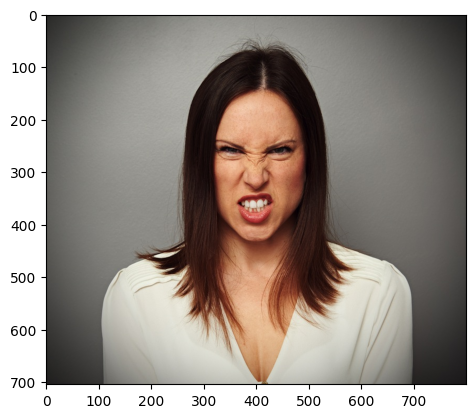

In [219]:
plt.imshow(img[:,:, ::-1])
plt.show()

In [221]:
result= DeepFace.analyze(img, "emotion")

Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]


In [223]:
emotion =result[0]['dominant_emotion']
emotion

'angry'

In [212]:
cam = cv2.VideoCapture('videos/production_id_3992630 (2160p).mp4')
fps= cam.get(cv2.CAP_PROP_FPS)

# Checking if the video file was opened successfully
if not cam.isOpened():
    print('Failed to open video file')
    exit()

# Initializing the frame counter
i = 0
images = []
n=5
# Looping until the end of the video file
while True:
    # Reading the next frame of the video
    ret, frame = cam.read()

    # If the frame was read successfully, checking the frame counter
    if ret:
        if i % int(fps / n) == 0: 
            images.append(frame)
        i += 1
    else:
        break

cam.release()
cv2.destroyAllWindows()

In [213]:
def has_face(img):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detecting faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # If faces are detected, return True; otherwise, return False
    return len(faces) > 0

In [214]:
frame_timestamps = []

# Looping through all frames to calculate timestamps
for i in range(len(images)):
    frame_timestamps.append((i // n)+1)

In [215]:
import csv

csv_file_name = 'output_files\emotions_over_time_frames.csv'

with open(csv_file_name, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
     
    csv_writer.writerow(['Timestamp(seconds)', 'Frame Number', 'Emotion'])
    for i in range(len(images)):
        if  has_face(images[i]):
            result = (DeepFace.analyze(images[i], "emotion"))
            csv_writer.writerow([frame_timestamps[i], i, result[0]['dominant_emotion'] ])
        else:
             csv_writer.writerow([frame_timestamps[i], i, 'no face detected'])

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.37it/s]


In [216]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_name)

# Group the data by timestamp (seconds)
grouped = df.groupby('Timestamp(seconds)')
detailed_csv_name='output_files\emotions_over_time_seconds.csv' 
with open( detailed_csv_name, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Timestamp(seconds)', 'avg Emotion'])


# Iterate through each group (each second)
    for timestamp, group_data in grouped:
        # Check if all images in this second have "no face detected"
        all_no_face = all(emotion == 'no face detected' for emotion in group_data['Emotion'])
        
        # Calculate the average emotion within this second
        if all_no_face:
            average_emotion = 'no face detected'
            csv_writer.writerow([timestamp,average_emotion ])
            
        else:
            emotions = group_data['Emotion']
            average_emotion = emotions.mode().values[0] if len(emotions) > 0 else 'no face detected'
            csv_writer.writerow([timestamp,average_emotion ])
